In [16]:
import pandas as pd
import numpy as np

In [17]:
old_train = pd.read_csv("/Users/lucasgoh/Library/CloudStorage/GoogleDrive-zwg210@nyu.edu/My Drive/2-Semesters-based Folders/0-Fall 2023/15-072_Analytics-Edge/edge-project-2023/1-data/simplified_train_with_index.csv")
last_min = pd.read_csv("/Users/lucasgoh/Library/CloudStorage/GoogleDrive-zwg210@nyu.edu/My Drive/2-Semesters-based Folders/0-Fall 2023/15-072_Analytics-Edge/edge-project-2023/1-data/last_min_data.csv")

In [21]:
last_min

,stock_id,date_id,seconds_in_bucket,wap,target,time_id,row_id,weight,weighted_wap,index,next_wap,next_index,next_weighted_wap,expected_target,discrepancy
0,0,451,490,1.000955,1.820326,24854,451_490_0,0.004000,0.004004,1.001076,22.135660,22.138164,0.088543,1.820551,-0.000225
1,1,451,490,1.003257,5.780458,24854,451_490_1,0.001000,0.001003,1.001076,22.186965,22.138164,0.022184,5.780515,-0.000056
2,2,451,490,0.999220,4.999638,24854,451_490_2,0.002000,0.001999,1.001076,22.097609,22.138164,0.044204,4.999750,-0.000112
3,3,451,490,1.000866,0.369549,24854,451_490_3,0.005999,0.006004,1.001076,22.133546,22.138164,0.132777,0.369886,-0.000337
4,4,451,490,1.000089,-1.279712,24854,451_490_4,0.004001,0.004001,1.001076,22.116199,22.138164,0.088480,-1.279487,-0.000225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,195,480,540,1.000328,2.310276,26454,480_540_195,0.004001,0.004002,0.998756,1.917643,1.914399,0.007672,2.310702,-0.000426
35996,196,480,540,1.000819,-8.220077,26454,480_540_196,0.001000,0.001001,0.998756,1.917531,1.914399,0.001917,-8.219970,-0.000107
35997,197,480,540,0.995797,1.169443,26454,480_540_197,0.004000,0.003983,0.998756,1.908844,1.914399,0.007636,1.169867,-0.000424
35998,198,480,540,0.999008,-1.540184,26454,480_540_198,0.005999,0.005994,0.998756,1.914728,1.914399,0.011487,-1.539546,-0.000638


In [18]:
old_train = old_train[old_train["date_id"] > 450]
old_train

,stock_id,date_id,seconds_in_bucket,wap,target,time_id,row_id,weight,weighted_wap,index,next_wap,next_index
4907980,0,451,0,1.000000,12.749434,24805,451_0_0,0.004000,0.004000,1.000000,1.001521,1.000246
4907981,1,451,0,1.000000,-0.090003,24805,451_0_1,0.001000,0.001000,1.000000,1.000238,1.000246
4907982,2,451,0,1.000000,5.480051,24805,451_0_2,0.002000,0.002000,1.000000,1.000795,1.000246
4907983,3,451,0,1.000000,-3.870130,24805,451_0_3,0.005999,0.005999,1.000000,0.999860,1.000246
4907984,4,451,0,1.000000,2.980232,24805,451_0_4,0.004001,0.004001,1.000000,1.000545,1.000246
...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,1.000328,2.310276,26454,480_540_195,0.004001,0.004002,0.998756,NaN,NaN
5237976,196,480,540,1.000819,-8.220077,26454,480_540_196,0.001000,0.001001,0.998756,NaN,NaN
5237977,197,480,540,0.995797,1.169443,26454,480_540_197,0.004000,0.003983,0.998756,NaN,NaN
5237978,198,480,540,0.999008,-1.540184,26454,480_540_198,0.005999,0.005994,0.998756,NaN,NaN


In [22]:
# Assuming 'old_train' is your dataframe with 'stock_id' and 'next_wap' columns

# Group by 'stock_id' and calculate min and max of 'next_wap' for each group
range_per_stock = old_train.groupby('stock_id')['next_wap'].agg([min, max])

# Calculate the range (max - min) for each stock_id
range_per_stock['range'] = range_per_stock['max'] - range_per_stock['min']

# Print the results
for stock_id in range_per_stock.index:
    range_value = range_per_stock.loc[stock_id, 'range']
    print(f"Stock ID {stock_id} - Range of next_wap: {range_value}")


Stock ID 0 - Range of next_wap: 0.009599000000000024
Stock ID 1 - Range of next_wap: 0.01844200000000007
Stock ID 2 - Range of next_wap: 0.012477000000000071
Stock ID 3 - Range of next_wap: 0.008477000000000068
Stock ID 4 - Range of next_wap: 0.006050000000000111
Stock ID 5 - Range of next_wap: 0.014566000000000079
Stock ID 6 - Range of next_wap: 0.011978999999999962
Stock ID 7 - Range of next_wap: 0.012112000000000012
Stock ID 8 - Range of next_wap: 0.011579000000000006
Stock ID 9 - Range of next_wap: 0.013641999999999932
Stock ID 10 - Range of next_wap: 0.01302800000000015
Stock ID 11 - Range of next_wap: 0.019662999999999986
Stock ID 12 - Range of next_wap: 0.010516999999999888
Stock ID 13 - Range of next_wap: 0.011742999999999948
Stock ID 14 - Range of next_wap: 0.014248000000000038
Stock ID 15 - Range of next_wap: 0.010758000000000156
Stock ID 16 - Range of next_wap: 0.011496000000000062
Stock ID 17 - Range of next_wap: 0.012155000000000027
Stock ID 18 - Range of next_wap: 0.01819

/var/folders/gp/7f5d9bz54rgg8x8hbqxjrr2h0000gn/T/ipykernel_86724/3526564861.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  range_per_stock = old_train.groupby('stock_id')['next_wap'].agg([min, max])
/var/folders/gp/7f5d9bz54rgg8x8hbqxjrr2h0000gn/T/ipykernel_86724/3526564861.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  range_per_stock = old_train.groupby('stock_id')['next_wap'].agg([min, max])


In [20]:
# Assuming 'last_min' is your dataframe with 'stock_id' and 'next_wap' columns

# Group by 'stock_id' and calculate min and max of 'next_wap' for each group
range_per_stock = last_min.groupby('stock_id')['next_wap'].agg([min, max])

# Calculate the range (max - min) for each stock_id
range_per_stock['range'] = range_per_stock['max'] - range_per_stock['min']

# Print the results
for stock_id in range_per_stock.index:
    range_value = range_per_stock.loc[stock_id, 'range']
    print(f"Stock ID {stock_id} - Range of next_wap: {range_value}")


Stock ID 0 - Range of next_wap: 7040.211141151881
Stock ID 1 - Range of next_wap: 7057.400471642623
Stock ID 2 - Range of next_wap: 7044.678701882347
Stock ID 3 - Range of next_wap: 7055.0752113136805
Stock ID 4 - Range of next_wap: 7060.02342459583
Stock ID 5 - Range of next_wap: 7041.789582167438
Stock ID 6 - Range of next_wap: 7070.596235372289
Stock ID 7 - Range of next_wap: 7053.393951637798
Stock ID 8 - Range of next_wap: 7047.5672034505
Stock ID 9 - Range of next_wap: 7057.7552994806665
Stock ID 10 - Range of next_wap: 7051.114564115876
Stock ID 11 - Range of next_wap: 7059.400957790585
Stock ID 12 - Range of next_wap: 7036.989025219257
Stock ID 13 - Range of next_wap: 7053.868166146491
Stock ID 14 - Range of next_wap: 7031.304635560537
Stock ID 15 - Range of next_wap: 7072.118415872347
Stock ID 16 - Range of next_wap: 7040.321619332309
Stock ID 17 - Range of next_wap: 7051.616534868186
Stock ID 18 - Range of next_wap: 7046.038870183998
Stock ID 19 - Range of next_wap: 7037.6554

/var/folders/gp/7f5d9bz54rgg8x8hbqxjrr2h0000gn/T/ipykernel_86724/322683409.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  range_per_stock = last_min.groupby('stock_id')['next_wap'].agg([min, max])
/var/folders/gp/7f5d9bz54rgg8x8hbqxjrr2h0000gn/T/ipykernel_86724/322683409.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  range_per_stock = last_min.groupby('stock_id')['next_wap'].agg([min, max])


In [4]:
last_min

,stock_id,date_id,seconds_in_bucket,wap,target,time_id,row_id,weight,weighted_wap,index,next_wap,next_index,next_weighted_wap,expected_target,discrepancy
0,0,451,490,1.000955,1.820326,24854,451_490_0,0.004000,0.004004,1.001076,22.135660,22.138164,0.088543,1.820551,-0.000225
1,1,451,490,1.003257,5.780458,24854,451_490_1,0.001000,0.001003,1.001076,22.186965,22.138164,0.022184,5.780515,-0.000056
2,2,451,490,0.999220,4.999638,24854,451_490_2,0.002000,0.001999,1.001076,22.097609,22.138164,0.044204,4.999750,-0.000112
3,3,451,490,1.000866,0.369549,24854,451_490_3,0.005999,0.006004,1.001076,22.133546,22.138164,0.132777,0.369886,-0.000337
4,4,451,490,1.000089,-1.279712,24854,451_490_4,0.004001,0.004001,1.001076,22.116199,22.138164,0.088480,-1.279487,-0.000225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,195,480,540,1.000328,2.310276,26454,480_540_195,0.004001,0.004002,0.998756,1.917643,1.914399,0.007672,2.310702,-0.000426
35996,196,480,540,1.000819,-8.220077,26454,480_540_196,0.001000,0.001001,0.998756,1.917531,1.914399,0.001917,-8.219970,-0.000107
35997,197,480,540,0.995797,1.169443,26454,480_540_197,0.004000,0.003983,0.998756,1.908844,1.914399,0.007636,1.169867,-0.000424
35998,198,480,540,0.999008,-1.540184,26454,480_540_198,0.005999,0.005994,0.998756,1.914728,1.914399,0.011487,-1.539546,-0.000638


In [5]:
columns_to_update = ["next_wap", "next_index"]

# Looping through each column to update
for col in columns_to_update:
    # Check if the column exists in both DataFrames
    if col in old_train.columns and col in last_min.columns:
        # Create a mapping from 'row_id' to the column in 'last_min'
        value_mapping = last_min.set_index('row_id')[col]

        # Replace missing values in 'old_train' using the mapping
        # .map() is used to align 'row_id' in 'old_train' with indices in 'value_mapping'
        # .combine_first() is used to fill in missing values
        old_train[col] = old_train['row_id'].map(value_mapping).combine_first(old_train[col])

In [6]:
old_train

,stock_id,date_id,seconds_in_bucket,wap,target,time_id,row_id,weight,weighted_wap,index,next_wap,next_index
4907980,0,451,0,1.000000,12.749434,24805,451_0_0,0.004000,0.004000,1.000000,1.001521,1.000246
4907981,1,451,0,1.000000,-0.090003,24805,451_0_1,0.001000,0.001000,1.000000,1.000238,1.000246
4907982,2,451,0,1.000000,5.480051,24805,451_0_2,0.002000,0.002000,1.000000,1.000795,1.000246
4907983,3,451,0,1.000000,-3.870130,24805,451_0_3,0.005999,0.005999,1.000000,0.999860,1.000246
4907984,4,451,0,1.000000,2.980232,24805,451_0_4,0.004001,0.004001,1.000000,1.000545,1.000246
...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,1.000328,2.310276,26454,480_540_195,0.004001,0.004002,0.998756,1.917643,1.914399
5237976,196,480,540,1.000819,-8.220077,26454,480_540_196,0.001000,0.001001,0.998756,1.917531,1.914399
5237977,197,480,540,0.995797,1.169443,26454,480_540_197,0.004000,0.003983,0.998756,1.908844,1.914399
5237978,198,480,540,0.999008,-1.540184,26454,480_540_198,0.005999,0.005994,0.998756,1.914728,1.914399


In [7]:
train = pd.read_csv("/Users/lucasgoh/Library/CloudStorage/GoogleDrive-zwg210@nyu.edu/My Drive/2-Semesters-based Folders/0-Fall 2023/15-072_Analytics-Edge/edge-project-2023/1-data/train.csv")

In [8]:
train.head()
# Get the set of columns for each DataFrame
columns_in_train = set(train.columns)
columns_in_old_train = set(old_train.columns)

# Find columns that are in 'train' but not in 'old_train'
not_in_columns = columns_in_train - columns_in_old_train
not_in_columns

{'ask_price',
 'ask_size',
 'bid_price',
 'bid_size',
 'far_price',
 'imbalance_buy_sell_flag',
 'imbalance_size',
 'matched_size',
 'near_price',
 'reference_price'}

In [9]:
# List of columns to merge from 'train' to 'old_train'
columns_to_merge = [
    'ask_price', 'ask_size', 'bid_price', 'bid_size', 'far_price', 
    'imbalance_buy_sell_flag', 'imbalance_size', 'matched_size', 
    'near_price', 'reference_price'
]

# Merging specified columns
old_train_updated = old_train.merge(train[['row_id'] + columns_to_merge], on='row_id', how='left')
old_train_updated


,stock_id,date_id,seconds_in_bucket,wap,target,time_id,row_id,weight,weighted_wap,index,...,ask_price,ask_size,bid_price,bid_size,far_price,imbalance_buy_sell_flag,imbalance_size,matched_size,near_price,reference_price
0,0,451,0,1.000000,12.749434,24805,451_0_0,0.004000,0.004000,1.000000,...,1.000060,31225.16,0.999892,56601.00,NaN,-1,1.016637e+08,27901114.55,NaN,1.001570
1,1,451,0,1.000000,-0.090003,24805,451_0_1,0.001000,0.001000,1.000000,...,1.000218,20611.00,0.999782,20602.00,NaN,1,1.481195e+06,2922825.96,NaN,0.999733
2,2,451,0,1.000000,5.480051,24805,451_0_2,0.002000,0.002000,1.000000,...,1.000546,20691.30,0.999480,19685.00,NaN,0,0.000000e+00,7211807.46,NaN,0.999531
3,3,451,0,1.000000,-3.870130,24805,451_0_3,0.005999,0.005999,1.000000,...,1.000104,10653.66,0.999902,10059.75,NaN,-1,5.426093e+06,52742546.23,NaN,1.000054
4,4,451,0,1.000000,2.980232,24805,451_0_4,0.004001,0.004001,1.000000,...,1.000153,535.50,0.998472,5346.00,NaN,-1,6.102518e+06,10336604.95,NaN,1.000013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329995,195,480,540,1.000328,2.310276,26454,480_540_195,0.004001,0.004002,0.998756,...,1.000434,319862.40,1.000317,32257.04,0.999734,-1,2.440723e+06,28280361.74,0.999734,1.000317
329996,196,480,540,1.000819,-8.220077,26454,480_540_196,0.001000,0.001001,0.998756,...,1.000900,93393.07,1.000643,205108.40,1.000129,-1,3.495105e+05,9187699.11,1.000386,1.000643
329997,197,480,540,0.995797,1.169443,26454,480_540_197,0.004000,0.003983,0.998756,...,0.995883,180038.32,0.995789,16790.66,0.995789,0,0.000000e+00,12725436.10,0.995789,0.995789
329998,198,480,540,0.999008,-1.540184,26454,480_540_198,0.005999,0.005994,0.998756,...,0.999210,669893.00,0.998970,125631.72,0.999210,1,1.000899e+06,94773271.05,0.999210,0.999210


In [13]:
# Assuming 'old_train' is your dataframe with 'stock_id' and 'next_wap' columns

# Group by 'stock_id' and calculate min and max of 'next_wap' for each group
range_per_stock = old_train.groupby('stock_id')['next_wap'].agg([min, max])

# Calculate the range (max - min) for each stock_id
range_per_stock['range'] = range_per_stock['max'] - range_per_stock['min']

# Print the results
for stock_id in range_per_stock.index:
    range_value = range_per_stock.loc[stock_id, 'range']
    print(f"Stock ID {stock_id} - Range of next_wap: {range_value}")


Stock ID 0 - Range of next_wap: 7040.211141151881
Stock ID 1 - Range of next_wap: 7057.400471642623
Stock ID 2 - Range of next_wap: 7044.678701882347
Stock ID 3 - Range of next_wap: 7055.0752113136805
Stock ID 4 - Range of next_wap: 7060.02342459583
Stock ID 5 - Range of next_wap: 7041.789582167438
Stock ID 6 - Range of next_wap: 7070.596235372289
Stock ID 7 - Range of next_wap: 7053.393951637798
Stock ID 8 - Range of next_wap: 7047.5672034505
Stock ID 9 - Range of next_wap: 7057.7552994806665
Stock ID 10 - Range of next_wap: 7051.114564115876
Stock ID 11 - Range of next_wap: 7059.400957790585
Stock ID 12 - Range of next_wap: 7036.989025219257
Stock ID 13 - Range of next_wap: 7053.868166146491
Stock ID 14 - Range of next_wap: 7031.304635560537
Stock ID 15 - Range of next_wap: 7072.118415872347
Stock ID 16 - Range of next_wap: 7040.321619332309
Stock ID 17 - Range of next_wap: 7051.616534868186
Stock ID 18 - Range of next_wap: 7046.038870183998
Stock ID 19 - Range of next_wap: 7037.6554

/var/folders/gp/7f5d9bz54rgg8x8hbqxjrr2h0000gn/T/ipykernel_86724/3526564861.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  range_per_stock = old_train.groupby('stock_id')['next_wap'].agg([min, max])
/var/folders/gp/7f5d9bz54rgg8x8hbqxjrr2h0000gn/T/ipykernel_86724/3526564861.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  range_per_stock = old_train.groupby('stock_id')['next_wap'].agg([min, max])


In [14]:
# Assuming 'old_train' is your dataframe with 'stock_id' and 'wap' columns

# Group by 'stock_id' and calculate min and max of 'wap' for each group
range_per_stock = old_train.groupby('stock_id')['wap'].agg([min, max])

# Calculate the range (max - min) for each stock_id
range_per_stock['range'] = range_per_stock['max'] - range_per_stock['min']

# Print the results
for stock_id in range_per_stock.index:
    range_value = range_per_stock.loc[stock_id, 'range']
    print(f"Stock ID {stock_id} - Range of wap: {range_value}")


Stock ID 0 - Range of wap: 0.009599000000000024
Stock ID 1 - Range of wap: 0.01844200000000007
Stock ID 2 - Range of wap: 0.012477000000000071
Stock ID 3 - Range of wap: 0.008477000000000068
Stock ID 4 - Range of wap: 0.006050000000000111
Stock ID 5 - Range of wap: 0.014566000000000079
Stock ID 6 - Range of wap: 0.011978999999999962
Stock ID 7 - Range of wap: 0.012112000000000012
Stock ID 8 - Range of wap: 0.011579000000000006
Stock ID 9 - Range of wap: 0.013641999999999932
Stock ID 10 - Range of wap: 0.01302800000000015
Stock ID 11 - Range of wap: 0.019662999999999986
Stock ID 12 - Range of wap: 0.010516999999999888
Stock ID 13 - Range of wap: 0.011742999999999948
Stock ID 14 - Range of wap: 0.014248000000000038
Stock ID 15 - Range of wap: 0.010758000000000156
Stock ID 16 - Range of wap: 0.011496000000000062
Stock ID 17 - Range of wap: 0.012155000000000027
Stock ID 18 - Range of wap: 0.018193999999999932
Stock ID 19 - Range of wap: 0.01897800000000005
Stock ID 20 - Range of wap: 0.012

/var/folders/gp/7f5d9bz54rgg8x8hbqxjrr2h0000gn/T/ipykernel_86724/906805608.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  range_per_stock = old_train.groupby('stock_id')['wap'].agg([min, max])
/var/folders/gp/7f5d9bz54rgg8x8hbqxjrr2h0000gn/T/ipykernel_86724/906805608.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  range_per_stock = old_train.groupby('stock_id')['wap'].agg([min, max])


KeyboardInterrupt: 

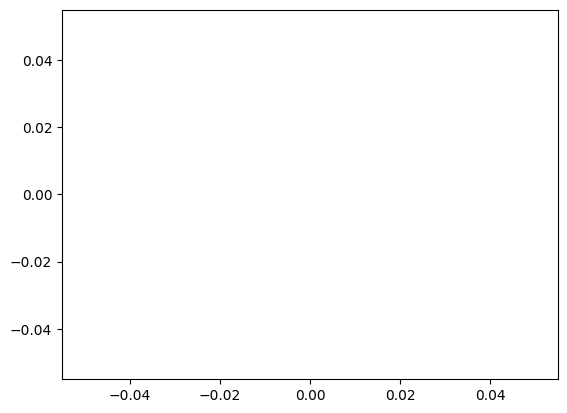

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(old_train['next_wap'], kde=True)
plt.title('Distribution of next_wap')
plt.xlabel('next_wap')
plt.ylabel('Frequency')
plt.show()

In [28]:
old_train_updated.to_csv("/Users/lucasgoh/Library/CloudStorage/GoogleDrive-zwg210@nyu.edu/My Drive/2-Semesters-based Folders/0-Fall 2023/15-072_Analytics-Edge/edge-project-2023/1-data/new_train_data.csv", index=False)